# Estimating the Age the universe

##### In this project I'm going to use the extragalactic database *HyperLeda*. 

The analysis will carry out as follows: 

1. Data cleaning 

In this project I'm using ```SELECT mod0, vgsr WHERE mod0 IS NOT NULL``` as SQL command to grap the data of interest into my analysis. 

**objname** : The name of an astronomical object, assigned by the scientific community.

**mod0** : The distance modulus of the astronomical object.

**vgsr** : The recorded velocity with which the astronomical object is moving away from the point of reference, in this case, the planet Earth.

I'm extracting all  distance vs. velocity data they had available (4240 galaxies) and excluding and NULL entries. The data from this query requests all objects which have numerical data for at least the distance modulus metric.

2. Define Kinematics 

Define kinematic equations and observe the unintuitive fact that the further the galaxies are from us, the faster they're moving away from us. 

We use `d= v*t` as y = m*x + b and define our linear model as if we switch x and y and set the intercept b to 0; the slope inverse will be time in seconds. Convert into years. 

3. Outliers. 

The problem of excluding or including the outliers is fundmental in any data analysis. It is releated to some cosmological models that we have but I found that I could present the results with and without outliers and see which one agrees more with the accepted value of hubble constant. 


In [17]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lgr



In [18]:
#Import the data
# Convert Distance Modulus to MegaParsecs

x,y = list(np.loadtxt('data.txt', 
           unpack=True,delimiter=','))
# Convert Parsecs to Kilometers
x = 10*(10**(x/5))/(10**6)
x_filtered = []
y_filtered = []


In [19]:
# define dataset variables and take averages
x_avg = np.average(x)
x_std = np.std(x)
y_avg = np.average(y)
y_std = np.std(y)

i = 0
while i < len(x) - 1:
    if (x[i] <= x_avg + x_std 
        and x[i] >= x_avg - x_std 
        and y[i] <= y_avg + y_std 
        and y[i] >= y_avg - y_std):
            x_filtered.append(x[i])
            y_filtered.append(y[i])
    i+=1


In [20]:
#define our cosmological model equations 
# I'm using linear model
model = lgr().fit(np.array(x).reshape(-1, 1), y)
y_pred = model.coef_ * x + model.intercept_
model_filtered = lgr().fit(np.array(x_filtered).reshape(-1, 1), y_filtered)
y_predfiltered = model_filtered.coef_ * x_filtered + model_filtered.intercept_


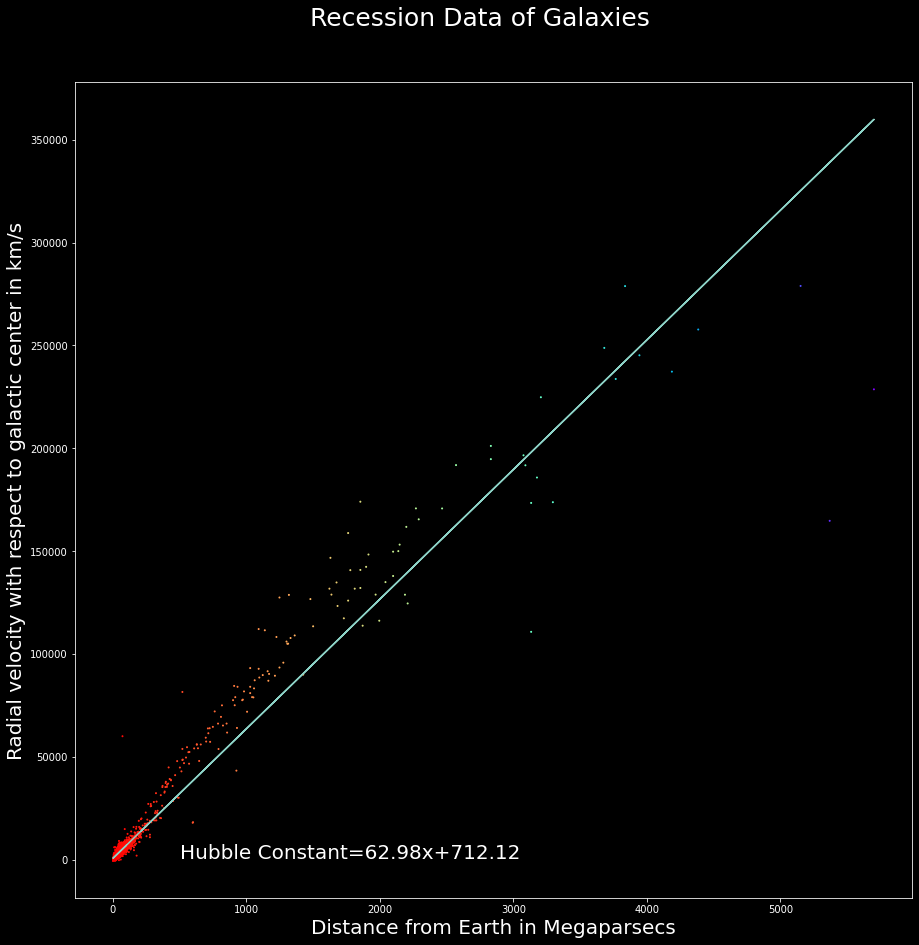

In [21]:
# plot with outliers included in our model 
plt.style.use("dark_background")
plt.figure(figsize = (15,15))
plt.scatter(x, y, c = x, cmap = 'rainbow_r', s=1)
plt.plot(x, y_pred)
plt.suptitle("Recession Data of Galaxies", 
              fontsize = 25, y = .95)
plt.xlabel('Distance from Earth in Megaparsecs',fontsize = 20)
plt.ylabel('Radial velocity with respect to galactic center in km/s',
            fontsize = 20)
plt.text(500, 500, 
         'Hubble Constant={:.2f}x+{:.2f}'.format(float(model.coef_), model.intercept_), 
         fontsize = 20)

plt.show()


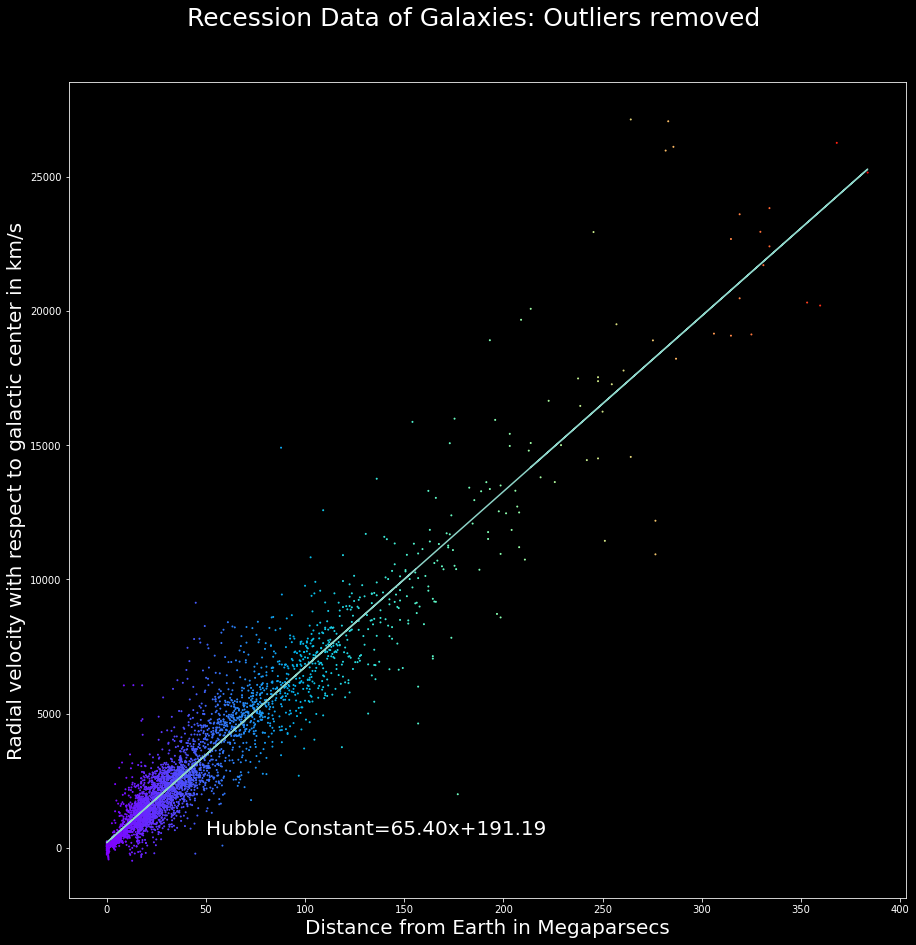

In [24]:
# plot without the outliers 

plt.style.use("dark_background")
plt.figure(figsize = (15,15))
plt.scatter(x_filtered,y_filtered, c = x_filtered, cmap = 'rainbow', s=1)
plt.plot(x_filtered, y_predfiltered)
plt.suptitle("Recession Data of Galaxies: Outliers removed", 
              fontsize = 25, y = .95)
plt.xlabel('Distance from Earth in Megaparsecs',fontsize = 20)
plt.ylabel('Radial velocity with respect to galactic center in km/s',
            fontsize = 20)
plt.text(50, 500, 
         'Hubble Constant={:.2f}x+{:.2f}'.format(float(model_filtered.coef_), model_filtered.intercept_), 
         fontsize = 20)
plt.show()


We can see that with outliers included we get H_0 =  62.98 ±712  which is not in agreement with the accepted value of 68.0 but when we exclude the outliers I get a better and agreement with a value of 65.40±191. 


The age of universe can be calculated as resipcal of the hubble constant. 

**Hint**: Age of the universe is not 1/H_0 but there should be some correction factor that account for relative abundance of dark energy/(dark) matter/radiation and it is close of 1 which why we use this assumption. 

In [32]:
# Calculate age of universe 

# Accepted value for Age of Universe:
accage = 13.799e9 # Years

#Our value
Age =1.3734e+10# Years
print("Age of the universe is",Age)

Error = abs((accage-Age)/(accage)*100)
print("Relative Error from accepted Age",Error)


Age of the universe is 13734000000.0
Relative Error from accepted Age 0.47104862671208064


We find that we are close by 0.47% from the accepted value obtained from [Wikipedia](https://en.wikipedia.org/wiki/Age_of_the_universe). Which is pretty good. 